In [2]:
!pip install pandas matplotlib

  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/ed/8c/87ddf1fcb55d11f9f847e3c69bb1c6f8e46e2f40ab1a2d2abadb2401b007/pandas-2.2.3-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for pytz>=2020.1 from https://files.pythonhosted.org/packages/81/c4/34e93fe5f5429d7570ec1fa436f1986fb1f00c3e0f43a589fe2bbcd22c3f/pytz-2025.2-py2.py3-none-any.whl.metadata
  Obtaining dependency information for tzdata>=2022.7 from https://files.pythonhosted.org/packages/5c/23/c7abc0ca0a1526a0774eca151daeb8de62ec457e77262b66b359c3c7679e/tzdata-2025.2-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.6 MB 653.6 kB/s eta 0:00:18
   ---------------------------------------- 0.0/11.6 MB 653.6 kB/s eta 0:00:18
   ---------------------------------------- 0.1/11.6 MB 508.4 kB/s eta 0:00:23
 


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# Импорт необходимых библиотек
# Import required libraries

import pandas as pd                      # Работа с таблицами / Working with tables
import matplotlib.pyplot as plt          # Построение графиков / Data visualization
import hashlib                           # Хеширование строк / Anonymization of personal data

In [6]:
!pip install openpyxl

  Obtaining dependency information for openpyxl from https://files.pythonhosted.org/packages/c0/da/977ded879c29cbd04de313843e76868e6e13408a94ed6b987245dc7c8506/openpyxl-3.1.5-py2.py3-none-any.whl.metadata
  Obtaining dependency information for et-xmlfile from https://files.pythonhosted.org/packages/c1/8b/5fe2cc11fee489817272089c4203e679c63b570a5aaeb18d852ae3cbba6a/et_xmlfile-2.0.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/250.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/250.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/250.9 kB 445.2 kB/s eta 0:00:01
   ---- ---------------------------------- 30.7/250.9 kB 445.2 kB/s eta 0:00:01
   ------ -------------------------------- 41.0/250.9 kB 281.8 kB/s eta 0:00:01
   ----------- --------------------------- 71.7/250.9 kB 393.8 kB/s eta 0:00:01
   -------------- ------------------------ 92.2/250.9 kB 479.1 kB/s eta 0:00:01
   ------------------ ------------------- 122.9


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
# Загрузка CSV и Excel файлов
# Loading CSV and Excel files

doc_views = pd.read_csv("doc_views.csv")  # Логи просмотров
payments = pd.read_excel("case_data.xlsx", sheet_name="Payments")  # Платежи

# Просмотр первых 5 строк каждой таблицы
doc_views.head(), payments.head()

(   document_id   user_id            viewed_at  \
 0      9738742   8469118  2020-11-30 22:59:56   
 1      2042372  13198098  2020-11-30 22:59:52   
 2      3653898  11182794  2020-11-30 22:59:41   
 3      7968789  13004670  2020-11-30 22:59:37   
 4      2036442  12525936  2020-11-30 22:59:30   
 
                               document_title              course_name  \
 0                   Sosiale medier - 2. time           Sosiale medier   
 1                Bedriften-kortsvarsspørsmål                Bedriften   
 2                 Sammendrag-i-markedsføring  Markedsføring-grunnkurs   
 3             Dydsetikk og abort, Hursthouse     Examen philosophicum   
 4  Kortsvar-bedriften - Sammendrag Bedriften                Bedriften   
 
                                   university_name  category_id  \
 0                             Handelshøyskolen BI            3   
 1                             Handelshøyskolen BI            7   
 2  Norges teknisk-naturvitenskapelige universitet 

In [12]:
# Преименование полей в doc_views под snake_case
# Renaming columns to snake_case style

doc_views = doc_views.rename(columns={
    'ID': 'id',
    'Name': 'name',
    'Last Name': 'last_name',
    'Passport Number': 'passport_number'
})

# Проверим результат
doc_views.head()


,document_id,user_id,viewed_at,document_title,course_name,university_name,category_id,category_name,premium,rating,pages,word_count,id,name,last_name,passport_number
0,9738742,8469118,2020-11-30 22:59:56,Sosiale medier - 2. time,Sosiale medier,Handelshøyskolen BI,3,Lecture notes,0,0,1,151,1,Jacob,Edwards,1903155229
1,2042372,13198098,2020-11-30 22:59:52,Bedriften-kortsvarsspørsmål,Bedriften,Handelshøyskolen BI,7,Summaries,1,50,23,9551,2,Felicia,Smith,1466748063
2,3653898,11182794,2020-11-30 22:59:41,Sammendrag-i-markedsføring,Markedsføring-grunnkurs,Norges teknisk-naturvitenskapelige universitet,3,Lecture notes,0,1,107,37572,3,Erin,Parker,4864835140
3,7968789,13004670,2020-11-30 22:59:37,"Dydsetikk og abort, Hursthouse",Examen philosophicum,Universitetet i Oslo,8,Mandatory assignments,1,3,6,929,4,Morgan,Mcguire,1837181476
4,2036442,12525936,2020-11-30 22:59:30,Kortsvar-bedriften - Sammendrag Bedriften,Bedriften,Handelshøyskolen BI,7,Summaries,1,228,21,5567,5,Lisa,Erickson,5567324499


In [9]:
# Проверим информацию о типах данных и пропусках в doc_views
# Checking datatypes and missing values

doc_views.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2241 entries, 0 to 2240
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   document_id      2241 non-null   int64 
 1   user_id          2241 non-null   int64 
 2   viewed_at        2241 non-null   object
 3   document_title   2241 non-null   object
 4   course_name      2241 non-null   object
 5   university_name  2241 non-null   object
 6   category_id      2241 non-null   int64 
 7   category_name    1916 non-null   object
 8   premium          2241 non-null   int64 
 9   rating           2241 non-null   int64 
 10  pages            2241 non-null   int64 
 11  word_count       2241 non-null   int64 
 12  id               2241 non-null   int64 
 13  name             2241 non-null   object
 14  last_name        2241 non-null   object
 15  passport_number  2241 non-null   int64 
dtypes: int64(9), object(7)
memory usage: 280.3+ KB


In [10]:
# Преобразуем типы данных
# Convert datatypes for further processing

doc_views["viewed_at"] = pd.to_datetime(doc_views["viewed_at"])         # Дата и время
doc_views["passport_number"] = doc_views["passport_number"].astype(str) # Паспорт в строку


In [11]:
doc_views.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2241 entries, 0 to 2240
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   document_id      2241 non-null   int64         
 1   user_id          2241 non-null   int64         
 2   viewed_at        2241 non-null   datetime64[ns]
 3   document_title   2241 non-null   object        
 4   course_name      2241 non-null   object        
 5   university_name  2241 non-null   object        
 6   category_id      2241 non-null   int64         
 7   category_name    1916 non-null   object        
 8   premium          2241 non-null   int64         
 9   rating           2241 non-null   int64         
 10  pages            2241 non-null   int64         
 11  word_count       2241 non-null   int64         
 12  id               2241 non-null   int64         
 13  name             2241 non-null   object        
 14  last_name        2241 non-null   object 

In [13]:
# Уникальные пары ID и названий категорий
category_mapping = doc_views[["category_id", "category_name"]].dropna().drop_duplicates()
category_dict = dict(zip(category_mapping["category_id"], category_mapping["category_name"]))

# Заполняем пропущенные значения по соответствию ID
doc_views["category_name"] = doc_views["category_name"].fillna(doc_views["category_id"].map(category_dict))

# Проверим, остались ли NaN
doc_views["category_name"].isna().sum()


0

In [14]:
# Анонимизация паспортов через SHA-256 (обрезаем до 6 символов)
doc_views["passport_hash"] = doc_views["passport_number"].apply(
    lambda x: hashlib.sha256(x.encode()).hexdigest()[:6]
)

# Удалим оригинальные ФИО и паспорт
doc_views = doc_views.drop(columns=["name", "last_name", "passport_number"])

# Проверим результат
doc_views[["id", "passport_hash"]].head()


,id,passport_hash
0,1,7d41db
1,2,3032fb
2,3,5c1079
3,4,46d77f
4,5,6a5f12


In [15]:
# Количество полных дубликатов
doc_views.duplicated().sum()


0

In [16]:
# Сохраняем очищенные данные
# Saving cleaned data

doc_views.to_csv("clean_doc_views.csv", index=False, encoding="utf-8-sig")


In [17]:
# Повторная загрузка очищенных просмотров и платежей
df_views = pd.read_csv("clean_doc_views.csv")
df_payments = pd.read_excel("case_data.xlsx", sheet_name="Payments")

# Проверим, что всё ок
df_views.head(), df_payments.head()


(   document_id   user_id            viewed_at  \
 0      9738742   8469118  2020-11-30 22:59:56   
 1      2042372  13198098  2020-11-30 22:59:52   
 2      3653898  11182794  2020-11-30 22:59:41   
 3      7968789  13004670  2020-11-30 22:59:37   
 4      2036442  12525936  2020-11-30 22:59:30   
 
                               document_title              course_name  \
 0                   Sosiale medier - 2. time           Sosiale medier   
 1                Bedriften-kortsvarsspørsmål                Bedriften   
 2                 Sammendrag-i-markedsføring  Markedsføring-grunnkurs   
 3             Dydsetikk og abort, Hursthouse     Examen philosophicum   
 4  Kortsvar-bedriften - Sammendrag Bedriften                Bedriften   
 
                                   university_name  category_id  \
 0                             Handelshøyskolen BI            3   
 1                             Handelshøyskolen BI            7   
 2  Norges teknisk-naturvitenskapelige universitet 

In [18]:
# Сколько просмотров у каждого user_id
view_counts = df_views.groupby("user_id").size().reset_index(name="view_count")


In [19]:
# Суммарные оплаты по user_id
payments_sum = df_payments.groupby("user_id")["amount"].sum().reset_index()


In [20]:
# Объединяем
activity_check = view_counts.merge(payments_sum, on="user_id", how="left")
activity_check["amount"] = activity_check["amount"].fillna(0)

# Оставим только тех, кто активно читал, но ничего не заплатил
suspicious_users = activity_check[(activity_check["view_count"] >= 5) & (activity_check["amount"] == 0)]

# Выведем топ-10
suspicious_users.sort_values(by="view_count", ascending=False).head(10)


,user_id,view_count,amount
173,11182794,34,0.0
597,13204762,32,0.0
133,10891402,31,0.0
243,11576454,23,0.0
273,11896466,23,0.0
429,12905390,22,0.0
603,13204972,22,0.0
3,5337236,21,0.0
234,11539416,20,0.0
480,13025492,20,0.0


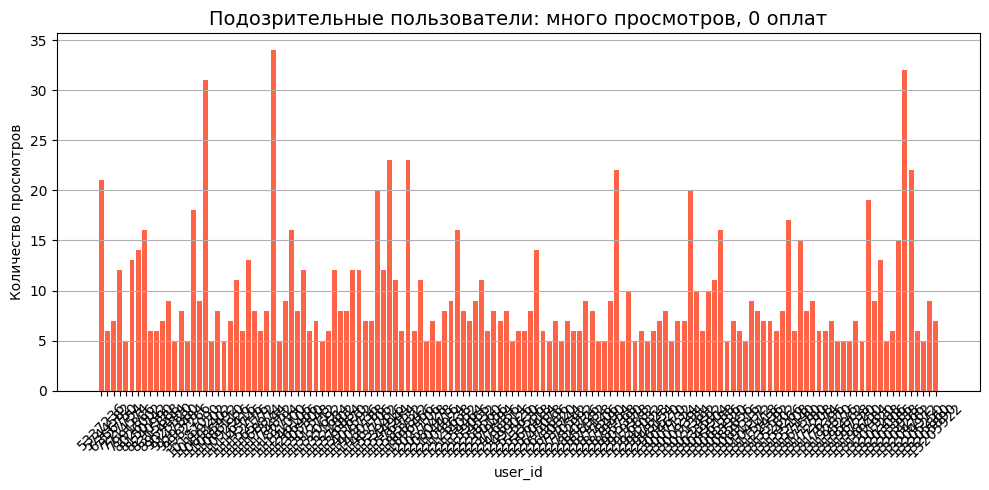

In [21]:
import matplotlib.pyplot as plt

# Топ халявщиков
plt.figure(figsize=(10,5))
plt.bar(suspicious_users["user_id"].astype(str), suspicious_users["view_count"], color='tomato')
plt.title("Подозрительные пользователи: много просмотров, 0 оплат", fontsize=14)
plt.xlabel("user_id")
plt.ylabel("Количество просмотров")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [22]:
# Фильтруем: высокие рейтинги при малом объёме текста
rating_threshold = 100
word_threshold = 300

suspicious_docs = df_views[(df_views["rating"] > rating_threshold) & (df_views["word_count"] < word_threshold)]

# Сортировка по рейтингу
suspicious_docs = suspicious_docs.sort_values(by="rating", ascending=False)[["document_title", "rating", "word_count", "pages"]]
suspicious_docs.head(10)


,document_title,rating,word_count,pages


In [23]:
# Ослабим пороги
rating_threshold = 50
word_threshold = 500

# Фильтруем подозрительные документы
suspicious_docs = df_views[
    (df_views["rating"] > rating_threshold) &
    (df_views["word_count"] < word_threshold)
]

# Сортируем по рейтингу и выводим ключевые поля
suspicious_docs = suspicious_docs.sort_values(by="rating", ascending=False)[
    ["document_title", "rating", "word_count", "pages"]
]

suspicious_docs.head(10)


,document_title,rating,word_count,pages


In [24]:
# Удалим неопознанных пользователей
payments_filtered = df_payments[df_payments["user_id"].notna()].copy()

# Создаём бинарную группу: trial ≤ 14 и > 14
payments_filtered["trial_group"] = payments_filtered["trial_days"].apply(
    lambda x: "short_trial (≤14)" if x <= 14 else "long_trial (>14)"
)

# Группировка по группе триала
trial_stats = payments_filtered.groupby("trial_group").agg(
    users_total=("user_id", "nunique"),
    payments_positive=("amount", lambda x: (x > 0).sum())
)

# Добавим долю оплативших
trial_stats["conversion_rate"] = (trial_stats["payments_positive"] / trial_stats["users_total"]).round(2)

trial_stats


,users_total,payments_positive,conversion_rate
trial_group,,,
long_trial (>14),3077,0,0.00
short_trial (≤14),254,261,1.03
